<a href="https://colab.research.google.com/github/H-arsha/smart_predective_maintenancee/blob/main/smart_predective_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
folders = ['data','notebook','src','app']
for folder in folders:
     os.makedirs(folder,exist_ok=True)

     import os
print("Current working directory:", os.getcwd())
!ls -l /content




Current working directory: /content
total 24
drwxr-xr-x 2 root root 4096 Aug  3 03:46 app
drwxr-xr-x 2 root root 4096 Aug  3 03:46 data
drwx------ 5 root root 4096 Aug  3 03:45 drive
drwxr-xr-x 2 root root 4096 Aug  3 03:46 notebook
drwxr-xr-x 1 root root 4096 Jul 29 13:36 sample_data
drwxr-xr-x 2 root root 4096 Aug  3 03:46 src


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   units_number            20631 non-null  int64  
 1   times_in_cycle          20631 non-null  int64  
 2   op_settings_1           20631 non-null  float64
 3   op_settings_2           20631 non-null  float64
 4   op_settings_3           20631 non-null  float64
 5   sensory_measurement_1   20631 non-null  float64
 6   sensory_measurement_2   20631 non-null  float64
 7   sensory_measurement_3   20631 non-null  float64
 8   sensory_measurement_4   20631 non-null  float64
 9   sensory_measurement_5   20631 non-null  float64
 10  sensory_measurement_6   20631 non-null  float64
 11  sensory_measurement_7   20631 non-null  float64
 12  sensory_measurement_8   20631 non-null  float64
 13  sensory_measurement_9   20631 non-null  float64
 14  sensory_measurement_10  20631 non-null

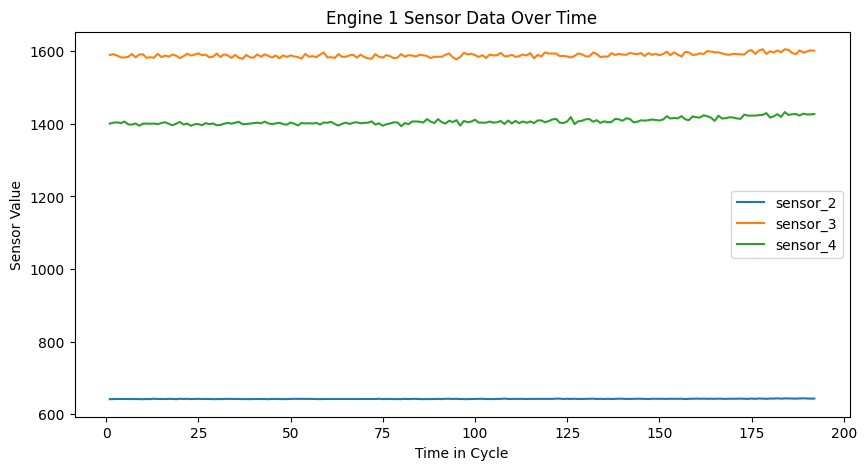

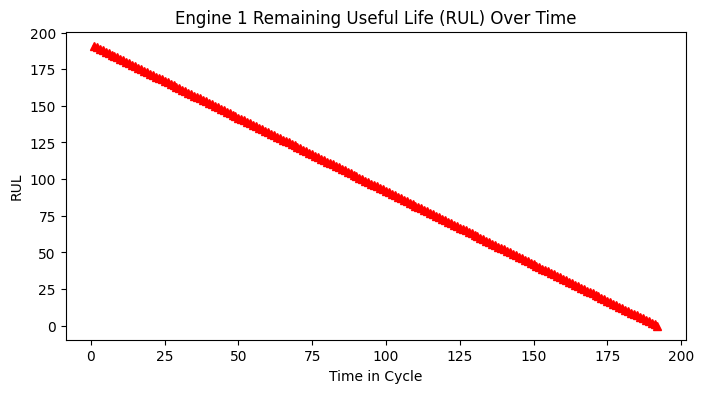

['sensory_measurement_1', 'sensory_measurement_2', 'sensory_measurement_3', 'sensory_measurement_4', 'sensory_measurement_5', 'sensory_measurement_6', 'sensory_measurement_7', 'sensory_measurement_8', 'sensory_measurement_9', 'sensory_measurement_10', 'sensory_measurement_11', 'sensory_measurement_12', 'sensory_measurement_13', 'sensory_measurement_14', 'sensory_measurement_15', 'sensory_measurement_16', 'sensory_measurement_17', 'sensory_measurement_18', 'sensory_measurement_19', 'sensory_measurement_20', 'sensory_measurement_21']
sensor variances:
sensory_measurement_19    0.000000e+00
sensory_measurement_18    0.000000e+00
sensory_measurement_16    2.422479e-28
sensory_measurement_10    2.172333e-25
sensory_measurement_5     1.152399e-23
sensory_measurement_1     4.273435e-21
sensory_measurement_6     1.929279e-06
sensory_measurement_15    1.406628e-03
sensory_measurement_8     5.038938e-03
sensory_measurement_13    5.172330e-03
sensory_measurement_21    1.171825e-02
sensory_measure

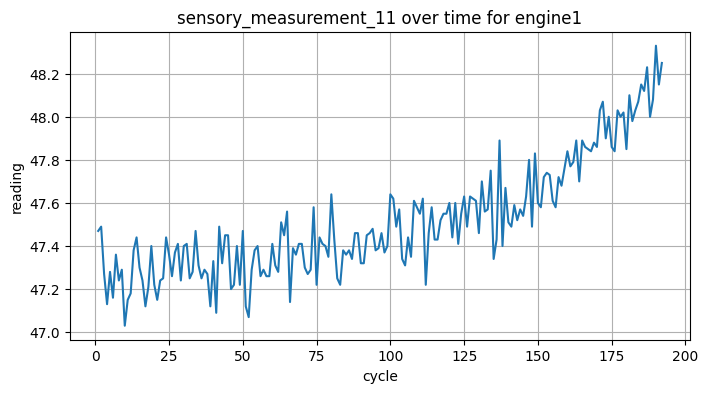

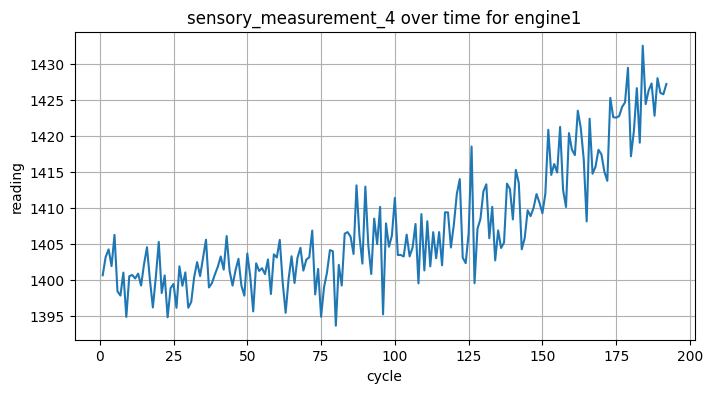

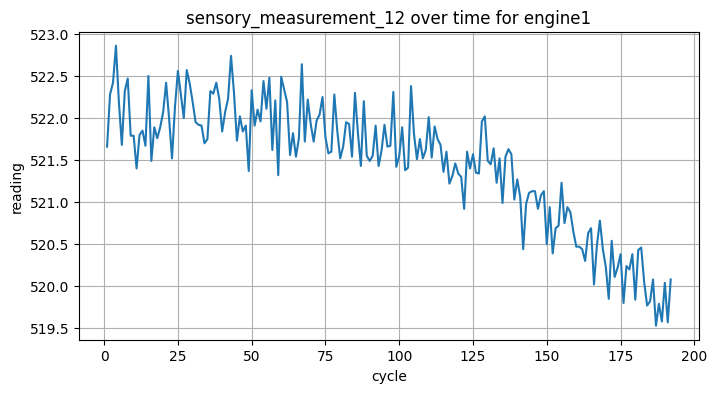

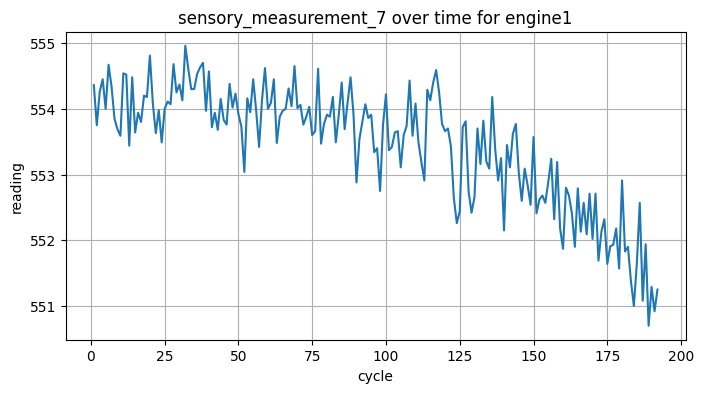

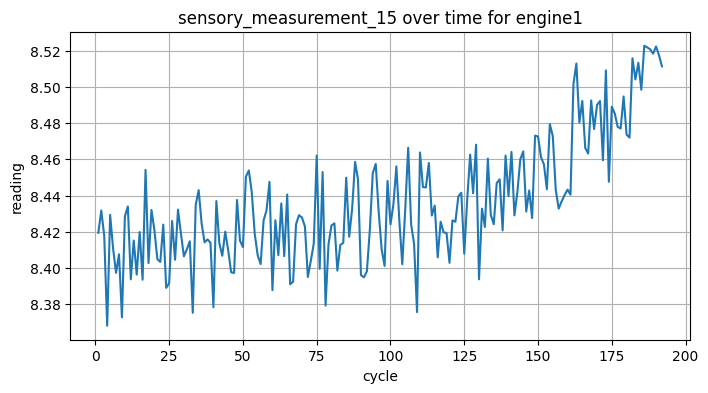

In [10]:
import pandas as pd

file_path = '/content/drive/MyDrive/CMAPSS/train_FD001.txt'
df = pd.read_csv(file_path, sep=" ", header=None)
df.head()
df.dropna(axis=1,inplace=True)
df.columns=['units_number','times_in_cycle']+\
           [f'op_settings_{i}' for i in range(1,4)]+\
           [f'sensory_measurement_{i}' for i in range(1,22)]
df.head()
df.info()
df.describe()
df['units_number'].nunique()

import matplotlib.pyplot as plt
engine1 = df[df['units_number']==1]

plt.figure(figsize=(10,5))
plt.plot(engine1['times_in_cycle'], engine1['sensory_measurement_2'], label='sensor_2')
plt.plot(engine1['times_in_cycle'], engine1['sensory_measurement_3'], label='sensor_3')
plt.plot(engine1['times_in_cycle'], engine1['sensory_measurement_4'], label='sensor_4')
plt.title('Engine 1 Sensor Data Over Time')
plt.xlabel('Time in Cycle')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

max_cycle_df=df.groupby('units_number')['times_in_cycle'].max().reset_index()
max_cycle_df.columns = ['units_number','max_cycle']

df = df.merge(max_cycle_df,on='units_number',how='left')
df['Rul'] = df['max_cycle'] - df['times_in_cycle']
df.drop(columns=['max_cycle'],inplace=True)
df[['units_number', 'times_in_cycle' , 'Rul']].head(10)

engine1=df[df['units_number']==1]
plt.figure(figsize=(8,4))
plt.plot(engine1['times_in_cycle'],engine1['Rul'],color='red',marker='^')
plt.title('Engine 1 Remaining Useful Life (RUL) Over Time')
plt.xlabel('Time in Cycle')
plt.ylabel('RUL')
plt.show()

sensor_cols=[col for col in df.columns if 'sensory_measurement_' in col]
print(sensor_cols)
variance=df[sensor_cols].var()
print("sensor variances:")
print(variance.sort_values())

low_var_sensors=variance[variance<0.01].index.tolist()
print("low variance sensors:")
print(low_var_sensors)

corelation_with_rul=df[sensor_cols+['Rul']].corr()['Rul'].drop('Rul').sort_values(ascending=False)

print("corelation with RUL:")
print(corelation_with_rul.sort_values)

top_sensors = corelation_with_rul.abs().sort_values(ascending=False).head(5).index.tolist()
for sensor in top_sensors:
  engine1 = df[df['units_number']==1]
  plt.figure(figsize=(8,4))
  plt.plot(engine1['times_in_cycle'],engine1[sensor],label=sensor)
  plt.title(f'{sensor} over time for engine1')
  plt.xlabel('cycle')
  plt.ylabel('reading')
  plt.grid(True)
  plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
